In [1]:
import qiskit

import matplotlib.pyplot as plt
import numpy as np
import math

from qiskit import QuantumCircuit, Aer, transpile, IBMQ, assemble, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.circuit.library import QFT

## QPE with T gate
Lets set up the quantum circuit with 4 qubits, where 0,1,2 are counting qubits and 3 is the eigen state of the Unitary Operator(T)

Lets initialize the initial state $${|\Psi>=|1>}$$ 

In [2]:
qpe=QuantumCircuit(4,3)
qpe.x(3)
qpe.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘
c: 3/═════

In [3]:
for qubit in range(3):
    qpe.h(qubit)
qpe.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ X ├
     └───┘
c: 3/═════

### Controlled Unitary Operations
Now creating the T operation.<br>
Since we want to implement T which performs T|1>=e^(2*pi*i*theta)|1>, we have to set lambda=(2*pi/8)=pi/4

In [4]:
repetitions = 1
for counting_qubit in range(3):
    for i in range(repetitions):
        qpe.cp(math.pi/4, counting_qubit, 3)
    repetitions *=2
qpe.draw()

┌───┐                                                               
q_0: ┤ H ├─■─────────────────────────────────────────────────────────────
     ├───┤ │                                                             
q_1: ┤ H ├─┼────────■────────■───────────────────────────────────────────
     ├───┤ │        │        │                                           
q_2: ┤ H ├─┼────────┼────────┼────────■────────■────────■────────■───────
     ├───┤ │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4) 
q_3: ┤ X ├─■────────■────────■────────■────────■────────■────────■───────
     └───┘                                                               
c: 3/════════════════════════════════════════════════════════════════════

Applying Inverse FT to convert the state of the counting register and measuring the register

In [5]:
qpe.barrier()
qpe = qpe.compose(QFT(3, inverse=True),[0,1,2])
qpe.barrier()

for n in range(3):
    qpe.measure(n,n)
    
qpe.draw()

┌───┐                                                                ░ »
q_0: ┤ H ├─■──────────────────────────────────────────────────────────────░─»
     ├───┤ │                                                              ░ »
q_1: ┤ H ├─┼────────■────────■────────────────────────────────────────────░─»
     ├───┤ │        │        │                                            ░ »
q_2: ┤ H ├─┼────────┼────────┼────────■────────■────────■────────■────────░─»
     ├───┤ │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  │P(π/4)  ░ »
q_3: ┤ X ├─■────────■────────■────────■────────■────────■────────■────────░─»
     └───┘                                                                ░ »
c: 3/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«     ┌──────────┐ ░ ┌─┐      
«q_0: ┤0         ├─░─┤M├──────
«     │          │ ░ └╥┘┌─┐   
«q_1: ┤1 IQFT_dg ├─░──╫─┤M├───
«     │          │ ░  ║ └╥┘┌─┐
«q_2: ┤2         ├─░──╫──╫─┤M├
«     └──────────┘ ░  ║  ║ └╥┘
«q_3: ─────────────░──╫──╫──╫─
«                  ░  ║  ║  ║ 
«c: 3/════════════════╩══╩══╩═
«                     0  1  2

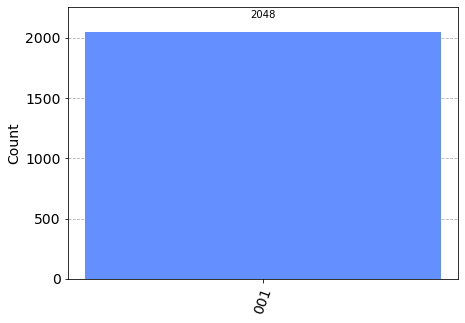

In [7]:
aer_sim=Aer.get_backend('aer_simulator')
shots=2048
results=aer_sim.run(transpile(qpe, aer_sim), shots=shots).result()
count=results.get_counts()
plot_histogram(count)

From the above histogram, we observe that the result is 001 with certainty.<br>
001 translates to decimal 1.<br>
Now, we have to divide this result (i.e.,1) by 2^n to get the value of theta.

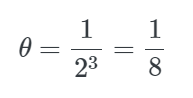
which is the result we expected.

## Observe the effect of getting more precision

For this case, lets take the gate with theta=1/3<br>
So, we want to implement U|1>=e^(2*pi*i*(1/3))|1><br>
For this, we have to set lambda=(2*pi)/3

In [14]:
qpe=QuantumCircuit(4,3)
qpe.x(3)

for qubit in range(3):
    qpe.h(qubit)

repetitions=1
for counting_qubits in range(3):
    for qubit in range(repetitions):
        qpe.cp(2*math.pi/3, counting_qubits, 3)
    repetitions *= 2

qpe=qpe.compose(QFT(3, inverse=True), [0,1,2])

for n in range(3):
    qpe.measure(n,n)

qpe.draw()

┌───┐                                                            »
q_0: ┤ H ├─■──────────────────────────────────────────────────────────»
     ├───┤ │                                                          »
q_1: ┤ H ├─┼─────────■─────────■──────────────────────────────────────»
     ├───┤ │         │         │                                      »
q_2: ┤ H ├─┼─────────┼─────────┼─────────■─────────■─────────■────────»
     ├───┤ │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3) »
q_3: ┤ X ├─■─────────■─────────■─────────■─────────■─────────■────────»
     └───┘                                                            »
c: 3/═════════════════════════════════════════════════════════════════»
                                                                      »
«               ┌──────────┐┌─┐      
«q_0: ──────────┤0         ├┤M├──────
«               │          │└╥┘┌─┐   
«q_1: ──────────┤1 IQFT_dg ├─╫─┤M├───
«               │          │ ║ └╥┘┌─┐
«q_2: ─■────────┤2         ├─╫──╫─┤M├
«      │P(2π/3) └──────────┘ ║  ║ └╥┘
«q_3: ─■─────────────────────╫──╫──╫─
«                            ║  ║  ║ 
«c: 3/═══════════════════════╩══╩══╩═
«                            0  1  2

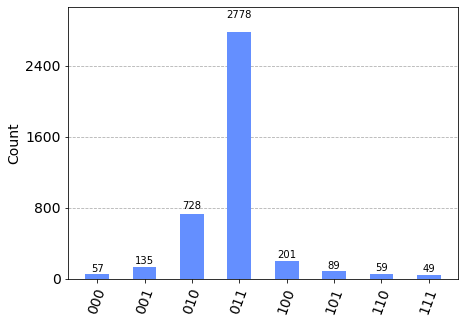

In [15]:
aer_sim=Aer.get_backend('aer_simulator')
shots=4096
results=aer_sim.run(transpile(qpe, aer_sim), shots=shots).result().get_counts()
plot_histogram(results)

Here, we are expecting the result to be theta=0.3333.... But what we are seeing is that the most likely results are 010 and 011 with higher probability than others.<br>
It can be predicted that the result lies between 010 and 011. However, the actual is not found yet and if we consider 011 to be the result, it comes with very less precision.<br>
Thus, we require a solution for this issue.
### Solution

In [20]:
qpe=QuantumCircuit(6,5)

qpe.x(5)

for qubit in range(5):
    qpe.h(qubit)
    
repetitions=1
for counting_qubits in range(5):
    for qubit in range(repetitions):
        qpe.cp(2*math.pi/3, counting_qubits, 5)
    repetitions *= 2

qpe=qpe.compose(QFT(5, inverse=True), range(5))

qpe.barrier()
for n in range(5):
    qpe.measure(n,n)
qpe.draw()

┌───┐                                                            »
q_0: ┤ H ├─■──────────────────────────────────────────────────────────»
     ├───┤ │                                                          »
q_1: ┤ H ├─┼─────────■─────────■──────────────────────────────────────»
     ├───┤ │         │         │                                      »
q_2: ┤ H ├─┼─────────┼─────────┼─────────■─────────■─────────■────────»
     ├───┤ │         │         │         │         │         │        »
q_3: ┤ H ├─┼─────────┼─────────┼─────────┼─────────┼─────────┼────────»
     ├───┤ │         │         │         │         │         │        »
q_4: ┤ H ├─┼─────────┼─────────┼─────────┼─────────┼─────────┼────────»
     ├───┤ │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3) »
q_5: ┤ X ├─■─────────■─────────■─────────■─────────■─────────■────────»
     └───┘                                                            »
c: 5/═════════════════════════════════════════════════════════════════»
                                                                      »
«                                                                           »
«q_0: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_1: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_2: ─■────────────────────────────────────────────────────────────────────»
«      │                                                                    »
«q_3: ─┼─────────■─────────■─────────■─────────■─────────■─────────■────────»
«      │         │         │         │         │         │         │        »
«q_4: ─┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼────────»
«      │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3) »
«q_5: ─■─────────■─────────■─────────■─────────■─────────■─────────■────────»
«                                                                           »
«c: 5/══════════════════════════════════════════════════════════════════════»
«                                                                           »
«                                                                           »
«q_0: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_1: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_2: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_3: ─■─────────■──────────────────────────────────────────────────────────»
«      │         │                                                          »
«q_4: ─┼─────────┼─────────■─────────■─────────■─────────■─────────■────────»
«      │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3)  │P(2π/3) »
«q_5: ─■─────────■─────────■─────────■─────────■─────────■─────────■────────»
«                                                                           »
«c: 5/══════════════════════════════════════════════════════════════════════»
«                                                                           »
«                                                                           »
«q_0: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_1: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_2: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_3: ─────────────────────────────────

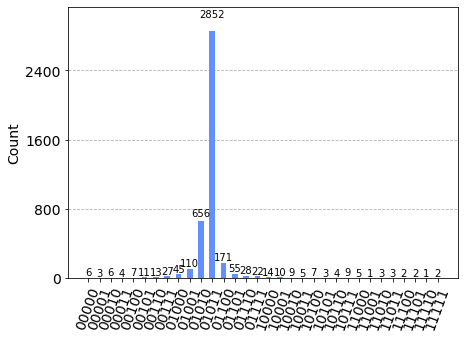

In [21]:
aer_sim=Aer.get_backend('aer_simulator')
shots=4096
result=aer_sim.run(transpile(qpe, aer_sim), shots=shots).result().get_counts()
plot_histogram(result)

From the above histogram, it is observed that 01011( decimal 11) and 01010(decimal 10) are observed with higher probability than others.<br>
So, taking this as the result and calculating theta,
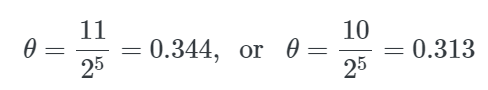
These two results differ from 1/3(actual theta) by 3% and 6% respectively.<br>
#### Thus, this has yielded a better precision in the phase value.